In [12]:
import os , shutil

original_dataset_dir = r'C:\Users\91708\Downloads\Dogs vs Cats'
base_dir = r'F:\Dogs and Cats'
os.mkdir(base_dir)



FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'F:\\Dogs and Cats'

In [13]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'F:\\Dogs and Cats\\train'

In [14]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


    
    
    


    
    
    

    





FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'F:\\Dogs and Cats\\train\\cats'

In [16]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
    

In [17]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [18]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [19]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [20]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [21]:
 print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [22]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


Building the model
----
You built a small convnet for MNIST in the previous example, so you should be familiar with such convnets. You’ll reuse the same general structure: the convnet will be a
stack of alternated Conv2D (with relu activation) and MaxPooling2D layers.
 But because you’re dealing with bigger images and a more complex problem, you’ll
make your network larger, accordingly: it will have one more Conv2D + MaxPooling2D
stage. This serves both to augment the capacity of the network and to further reduce
the size of the feature maps so they aren’t overly large when you reach the Flatten
layer. Here, because you start from inputs of size 150 × 150 (a somewhat arbitrary
choice), you end up with feature maps of size 7 × just before the Flatten layer. NOTE The depth of the feature maps progressively increases in the network
(from 32 to 128), whereas the size of the feature maps decreases (from 148 ×
148 to 7 × 7). This is a pattern you’ll see in almost all convnets.
Because you’re attacking a binary-classification problem, you’ll end the network with a
single unit (a Dense layer of size 1) and a sigmoid activation. This unit will encode the
probability that the network is looking at one class or the other.



In [23]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [25]:
from keras import optimizers

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(learning_rate = 1e-4),
             metrics=['acc'])







Data preprocessing
----

As you know by now, data should be formatted into appropriately preprocessed floatingpoint tensors before being fed into the network. Currently, the data sits on a drive as
JPEG files, so the steps for getting it into the network are roughly as follows:
1 Read the picture files.
2 Decode the JPEG content to RGB grids of pixels.
3 Convert these into floating-point tensors.
4 Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know,
neural networks prefer to deal with small input values).
It may seem a bit daunting, but fortunately Keras has utilities to take care of these
steps automatically. Keras has a module with image-processing helper tools, located at
keras.preprocessing.image. In particular, it contains the class ImageDataGenerator,
which lets you quickly set up Python generators that can automatically turn image files
on disk into batches of preprocessed tensors. This is what you’ll use here.


In [26]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150) ,
    batch_size=20,
    class_mode='binary')
    

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
    
    
    


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
for data_batch , labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break
    

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


In [28]:

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

C:\Users\91708\anaconda3\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 72s 584ms/step - loss: 0.6951 - acc: 0.5165 - val_loss: 0.6988 - val_acc: 0.5050
Epoch 2/30
100/100 [==============================] - 49s 489ms/step - loss: 0.6603 - acc: 0.5953 - val_loss: 0.6305 - val_acc: 0.6470
Epoch 3/30
100/100 [==============================] - 50s 497ms/step - loss: 0.5933 - acc: 0.6940 - val_loss: 0.7018 - val_acc: 0.5540
Epoch 4/30
100/100 [==============================] - 50s 496ms/step - loss: 0.5692 - acc: 0.7077 - val_loss: 0.6576 - val_acc: 0.6120
Epoch 5/30
100/100 [==============================] - 48s 482ms/step - loss: 0.5286 - acc: 0.7276 - val_loss: 0.5765 - val_acc: 0.6880
Epoch 6/30
100/100 [==============================] - 50s 496ms/step - loss: 0.5029 - acc: 0.7543 - val_loss: 0.6038 - val_acc: 0.6740
Epoch 7/30
100/100 [==============================] - 48s 484ms/step - loss: 0.4762 - acc: 0.7708 - val_loss: 0.5599 - val_acc: 0.6930
Epoch 8/30
100/100 [==============================] - 4

In [29]:
model.save('cats_and_dogs_small_1.h5')


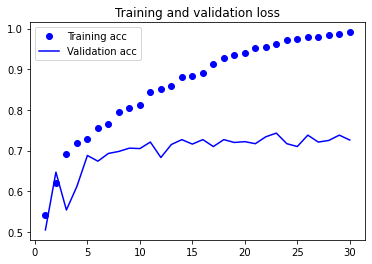

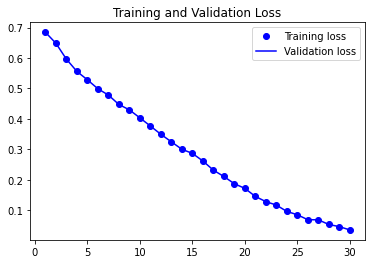

In [31]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['loss']

epochs =  range(1,len(acc) + 1)

plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs , val_acc , 'b' , label = 'Validation acc')
plt.title('Training and validation loss')
plt.legend()

plt.figure()

plt.plot(epochs , loss , 'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Model Augumentation
----------

Data Augumentation
----
Overfitting is caused by having too few samples to learn from, rendering you unable to train a model that can generalize to new data. Given infinite data, your modelwould be exposed to every possible aspect of the data distribution at hand: you would
never overfit. Data augmentation takes the approach of generating more training data
from existing training samples, by augmenting the samples via a number of random
transformations that yield believable-looking images. The goal is that at training time,
your model will never see the exact same picture twice. This helps expose the model
to more aspects of the data and generalize better.
In Keras, this can be done by configuring a number of random transformations to
be performed on the images read by the ImageDataGenerator instance. Let’s get
started with an example

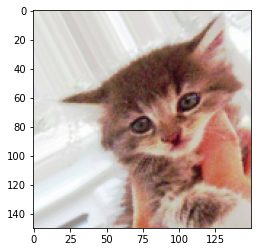

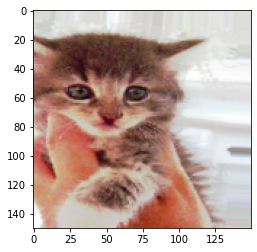

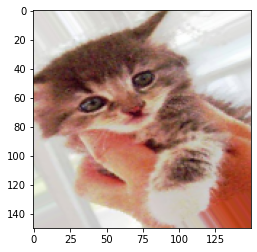

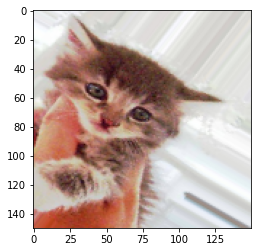

In [35]:
datagen =  ImageDataGenerator(
        rotation_range = 40 ,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        fill_mode = 'nearest')





from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
          fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x  = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0 
for batch in datagen.flow(x,batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [36]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])


C:\Users\91708\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [42]:
train_datagen = ImageDataGenerator(
       rescale = 1./255,
       rotation_range=40,
       width_shift_range=0.2,
       height_shift_range=0.2,
       shear_range=0.2,
       zoom_range=0.2,
       horizontal_flip = True,)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
              train_dir,
              target_size=(150,150),
              batch_size=32,
              class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                validation_dir,
                target_size = (150,150),
                batch_size= 32 ,
                class_mode = 'binary')
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs=100,
    validation_data=validation_generator,
     validation_steps=50)
                

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


C:\Users\91708\anaconda3\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 91s 854ms/step - loss: 0.6970 - acc: 0.4982 - val_loss: 0.6828 - val_acc: 0.5950
